# Geração de energia no Brasil nas últimas duas décadas
## Uma análise comparativa entre regiões do país

O Brasil é uma potência energética reconhecida mundialmente, tendo por natureza uma estrutura de recursos praticamente estratégica para a geração de energia, contando com usinas como as de Itaipu (Paraná), Usina de Belo Monte (Pará), Usina São Luíz dos Tapajós e de Tucuri (ambas também no Pará), o Brasil sempre teve recursos o suficiente para prover à população não apenas acesso à energia elétrica, mas também de qualidade. 

É estimado hoje que 100% da população brasileira tem acesso à energia elétrica - uma estimativa claramente arredondada para cima, já que o País conta com uma população que carece do acesso à energia de qualidade e segura especialmente em comunidades muito afastadas dos centros urbanos, periferias e assentamentos no interior do país.

Mas de acordo com o *ourworldindata*, o Brasil teve um avanço bastante significativo nos últimos 30 anos com relação ao acesso de energia elétrica para a população. E isso se dá devido à extensa matriz energética e o sistema interligado nacional de energia, além é claro de políticas públicas de acesso e distribuição de energia elétrica.

<img src="https://github.com/mooncake-jp/mooncake-jp.github.io/blob/master/energy_per_capta_brazil/share-of-the-population-with-access-to-electricity.png?raw=true">

### 1. Formulando o estudo

Apesar de ser um país com uma taxa de 100%~ de acesso à energia elétrica, o Brasil, até 2014, havia sofrido dois dos oito piores blecautes da história, ainda hoje a falta de energia elétrica - seja por razões naturais como falta de chuva e seca ou por falta de infraestrutura, o Brasil ainda sofre com muitos apagões. Mas afinal, o Brasil tem se desenvolvido na geração de energia elétrica nos últimos anos? 

O que vamos analisar aqui são dados referentes à produção de energia elétrica nas últimas duas décadas, separados por região.

### 2. Coleta de dados

Com base nos dados fornecidos pela ONS (Operador Nacional do Sistema Elétrico), podemos fazer uma análise comparativa da geração em média de energia diária entre as regiões brasileiras nos últimos 22 anos. 

In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import datetime
pd.options.mode.chained_assignment = None
os.chdir('./csv_files')

O site da ONS, disponibiliza os dados referentes à produção de energia no Brasil nos últimos 22 anos, todos os registros diários foram retirados do site em um total de 22 arquivos, os quais foram combinados em apenas um conjunto de dados a fim de exploração neste estudo.

Os arquivos fornecidos podem ser baixados em formato .xlsx ou .csv.

In [2]:
ext = 'csv' 
carga_total = [arquivo for arquivo in glob.glob('*.{}'.format(ext))]
#combina todos os dados em apenas um arquivo chamado "carga_final"
carga_final = pd.concat([pd.read_csv(f) for f in carga_total])
#salva o arquivo csv com o mesmo nome no diretório dos arquivos .csv
carga_final.to_csv( "carga_final.csv", index=False, encoding='utf-8-sig')

**Observação:** A execução do script acima deve ser feita apenas uma vez, pois não sobrescreve o arquivo gerado e sim adiciona um novo conjunto de dados dentro do mesmo arquivo.

### 3. Tratamento dos dados

Agora que temos os dados pertinentes ao nosso estudo, podemos analizar o formato em que esse registro de produção média de energia está sendo disponibilizado:

In [3]:
#mostra as 5 primeiras linhas de nosso DataFrame
carga_final.head()

,id_subsistema,nom_subsistema,din_instante,val_cargaenergiamwmed
0,N,NORTE,2010-01-01,3395.351667
1,NE,NORDESTE,2010-01-01,6660.990833
2,S,SUL,2010-01-01,5893.170450
3,SE,SUDESTE,2010-01-01,25055.569289
4,N,NORTE,2010-01-02,3417.356219


In [4]:
#fornece informações sobre os tipos de cada dado dentro do DataFrame
carga_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66682 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_subsistema          66682 non-null  object 
 1   nom_subsistema         66682 non-null  object 
 2   din_instante           66682 non-null  object 
 3   val_cargaenergiamwmed  66584 non-null  float64
dtypes: float64(1), object(3)
memory usage: 2.5+ MB


Podemos então dividir a produção de energia por estado:

In [5]:
nordeste = carga_final[carga_final['nom_subsistema'] == 'NORDESTE']
sudeste = carga_final[carga_final['nom_subsistema'] == 'SUDESTE']
sul = carga_final[carga_final['nom_subsistema'] == 'SUL']
norte = carga_final[carga_final['nom_subsistema'] == 'NORTE']
regioes = [nordeste, sul, sudeste, norte]

Retiramos as colunas que não nos interessa para nossa análise e preenchemos possívels NaN com zeros e convertemos a coluna referente aos dias para o formato *DateTime*

In [6]:
for estado in regioes:
    #retira as colunas 'id_subsistema' e 'nom_subsistema'
    estado.drop(columns=['id_subsistema', 'nom_subsistema'], inplace=True)
    #converte os dados da coluna 'din_instante' em DateTime
    estado['din_instante'] = pd.to_datetime(estado['din_instante'])
    #organiza os valores da coluna 'din_instante' em ordem crescente
    estado.sort_values('din_instante', inplace=True)

### 4. Explorando e visualizando os dados

Agora que os dados estão tratados da maneira que precisamos, armazenamos a soma do valor total de energia gerada em cada ano em variáveis referentes às regiões:

In [8]:
ne_ano = nordeste.groupby(nordeste.din_instante.dt.year)['val_cargaenergiamwmed'].sum()
n_ano = norte.groupby(norte.din_instante.dt.year)['val_cargaenergiamwmed'].sum()
se_ano = sudeste.groupby(sudeste.din_instante.dt.year)['val_cargaenergiamwmed'].sum()
s_ano = sul.groupby(sul.din_instante.dt.year)['val_cargaenergiamwmed'].sum()

Para melhor entendermos a diferença na produção de energia em cada região, o gráfico a seguir expressa muito bem essa variação:

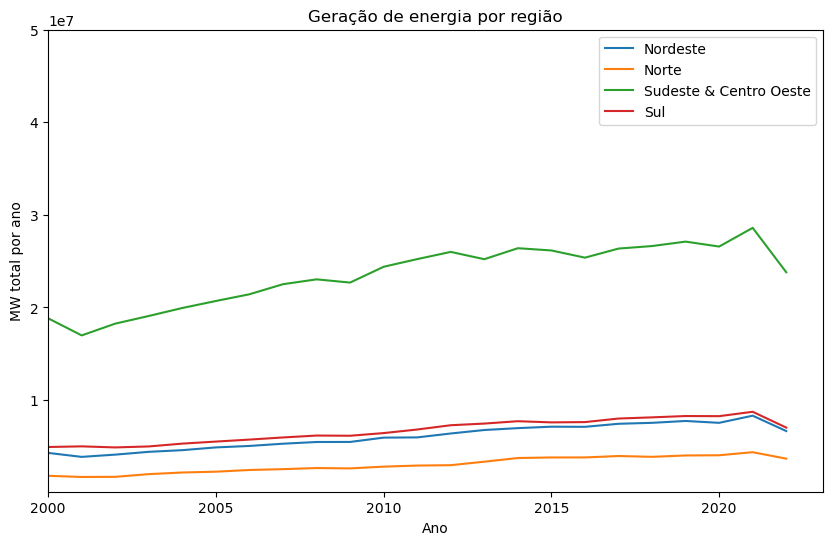

In [44]:
plt.figure(figsize=(10, 6))
plt.plot(ne_ano, label='Nordeste')
plt.plot(n_ano, label='Norte')
plt.plot(se_ano, label='Sudeste & Centro Oeste')
plt.plot(s_ano, label='Sul')
plt.legend(loc="upper right")
plt.ylabel('MW total por ano')
plt.xlabel('Ano')
plt.title('Geração de energia por região')
plt.ylim(0.1e6, 5e7 )
plt.xlim(2000)
plt.show()

Pode não parecer óbvio, mas podemos notar uma queda drástica na geração de energia no Sudeste e Centro Oeste, se traçarmos uma linha vertical nesse ponto, podemos perceber que ela cruza também uma pequena queda de produção no Nordeste na mesma época:

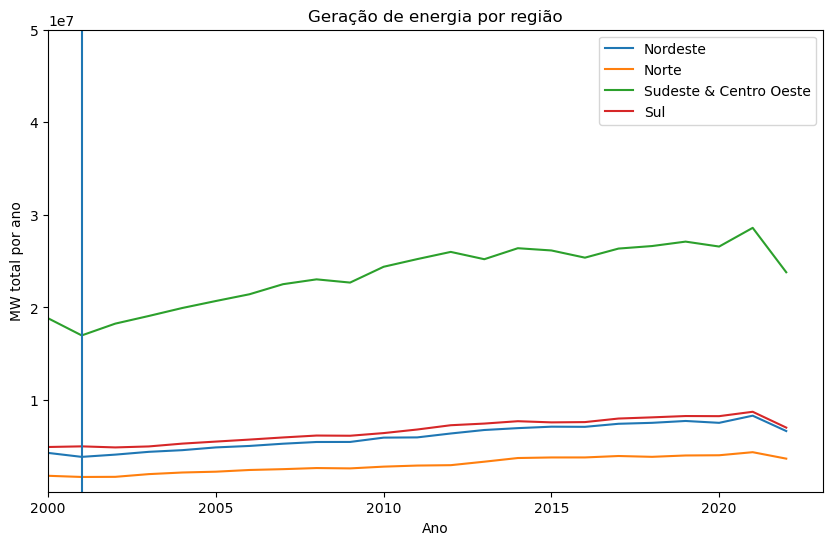

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(ne_ano, label='Nordeste')
plt.plot(n_ano, label='Norte')
plt.plot(se_ano, label='Sudeste & Centro Oeste')
plt.plot(s_ano, label='Sul')
plt.legend(loc="upper right")
plt.ylabel('MW total por ano')
plt.xlabel('Ano')
plt.title('Geração de energia por região')
plt.ylim(0.1e6, 5e7)
plt.xlim(2000)
plt.axvline(x=2001)
plt.show()

Para melhor interpretarmos esses dados, podemos utilizar o gráfico a seguir, pois expressa a geração de energia diariamente pelos últimos 22 anos:

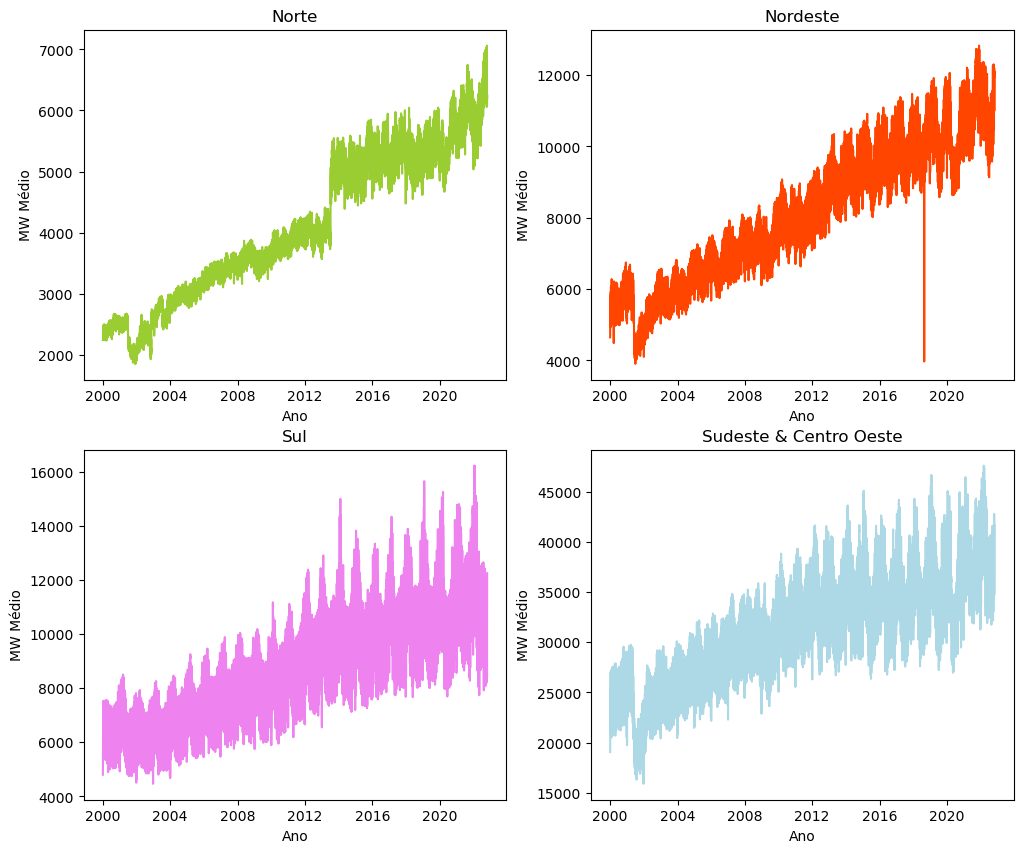

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(12,10))
axs[0, 0].plot(norte['din_instante'], norte['val_cargaenergiamwmed'], color='yellowgreen')
axs[0, 0].set_title('Norte')
axs[0, 0].set_ylabel('MW Médio')
axs[0, 0].set_xlabel('Ano')
axs[0, 1].plot(nordeste['din_instante'], nordeste['val_cargaenergiamwmed'], color='orangered')
axs[0, 1].set_title('Nordeste')
axs[0, 1].set_ylabel('MW Médio')
axs[0, 1].set_xlabel('Ano')
axs[1, 0].plot(sul['din_instante'], sul['val_cargaenergiamwmed'], color='violet')
axs[1, 0].set_title('Sul')
axs[1, 0].set_ylabel('MW Médio')
axs[1, 0].set_xlabel('Ano')
axs[1, 1].plot(sudeste['din_instante'], sudeste['val_cargaenergiamwmed'], color='lightblue')
axs[1, 1].set_title('Sudeste & Centro Oeste')
axs[1, 1].set_ylabel('MW Médio')
axs[1, 1].set_xlabel('Ano')
plt.show()

Assim como esperávamos, existe uma queda abrupta nas quatro regiões durante o mesmo período (aparentemente com exceção da região sul, onde a oscilação apesar de ser mais visível, não parece ter sofrido tanto durante a geração de energia no mesmo período).

Se traçarmos outra linha no gráfico, notamos que é um ponto em comum em todas as regiões, o que levanta a questão: **o que exatamente aconteceu durante esse período?**

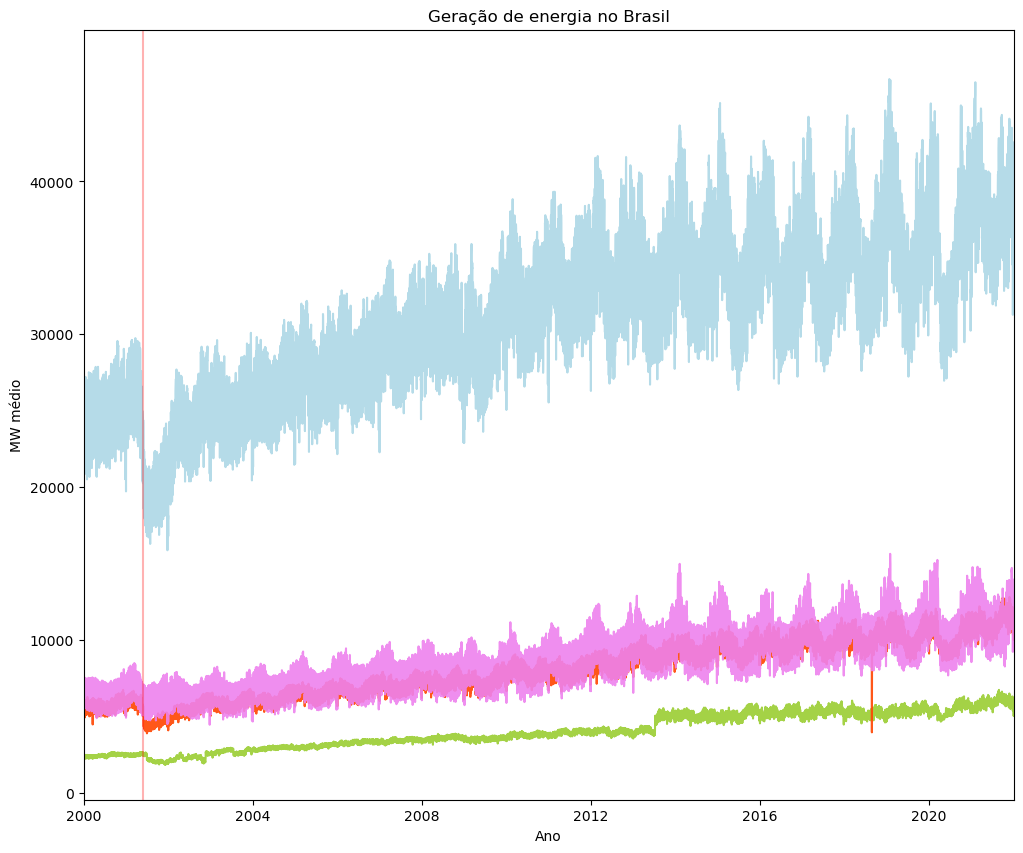

In [21]:
plt.figure(figsize=(12, 10))
plt.title('Geração de energia no Brasil')
plt.ylabel('MW médio')
plt.xlabel('Ano')
plt.plot(norte['din_instante'], norte['val_cargaenergiamwmed'], color='yellowgreen', alpha=0.9)
plt.plot(nordeste['din_instante'], nordeste['val_cargaenergiamwmed'], color='orangered', alpha=0.9)
plt.plot(sul['din_instante'], sul['val_cargaenergiamwmed'], color='violet', alpha=0.9)
plt.plot(sudeste['din_instante'], sudeste['val_cargaenergiamwmed'], color='lightblue', alpha=0.9)
plt.xlim([datetime.date(2000, 1, 1), datetime.date(2022, 1, 1)])
plt.axvline(x = datetime.date(2001, 6, 1),c='red', alpha=0.3)
plt.show()

Em 2001, o Brasil sofreu com uma crise de apagões que ficou marcada na vida de muitos brasileiros, não apenas por conta das implicações sociais que essa crise causou, mas também pelo envolvimento político que levou ao seu acontecimento.

Eu abordo este tema de uma forma mais profunda e introspectiva em um artigo meu publicado no Medium, você pode acessá-lo <a href="https://medium.com/@Archarios/apag%C3%A3o-um-mundo-mais-que-%C3%A0s-escuras-2e66e6a69e22">aqui</a> ou a sua versão em inglês <a href="https://medium.com/@Archarios/blackout-the-dark-side-of-the-earth-de9eae91d2df">neste link</a>.


Podemos tirar outros *insights* desse projeto, porém. Aqui vão alguns deles:

**1**. De todas as regiões, a região Norte é a que aparenta ter a menor oscilação na geração de energia nesses 22 anos, apesar de notarmos algumas quedas durante esse período, a oscilação é claramente menor quando comparada com as outras regiões, isso se dá pelo fato de que, por conta de fatores geográficos de luminosidade e evaporação, a região Norte possui o maior índice de pluviosidade do Brasil, tornando mais difícil que usinas hidrelétricas enfrentem secas constantes que diminúem a geração - outro fator que pode ser levado em consideração é a demanda de energia nessa região.

**2**. Como menciono no artigo do Medium, durante a crise de apagões, o governo solicitou um racionamento em mais de 16 estados distribuídos pelas regiões Norte, Nordeste, Sudeste e Centro Oeste, deixando assim a região Sul como a menos afetada durante esse período de falta de produção de energia, acredito que a infraestrutura da região garantiu que essa crise não a afetasse da mesma maneira como as outras regiões do país.

**3**. Na região Norte, podemos ver um aumento veriginoso na geração de energia entre o período de 2012 e 2016, isso se dá, provavelmente, pelo fato de ser o período de início de atividades da Usina de São Luíz dos Tapajós, licitada em 2015, com previsão de capacidade instalada de 6.356,4 MW quando finalizada.

Esta análise é um exercício da minha capacidade de análise de dados e interpretação de informações, feita com bastante dedicação em volta de um tema que é muito especial para mim. Este exercício visa a expressão de minhas habilidades com a utilização de ferramentas de análise e visualização de dados, assim como uma prática para o meu aprendizado na área, especialmente dentro do setor de energia.

**Fontes**:

<a href="https://medium.com/@Archarios/blackout-the-dark-side-of-the-earth-de9eae91d2df">Blackout, the dark side of the earth.</a>

<a href="https://medium.com/@Archarios/apag%C3%A3o-um-mundo-mais-que-%C3%A0s-escuras-2e66e6a69e22">Apagão, um mundo mais que às escuras.</a>

<a href="http://www.ons.org.br/">ONS (Operador Nacional do Sistema Elétrico)</a>
